In [4]:
#imports

import sys 
sys.path.append('..')
from rul_common.config import ConfigTrain as ct
from rul_common.utils_train import sensors
from rul_common.utils_train import header

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import warnings

#modeling part
from sklearn.cluster import KMeans
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier, Pool
from lightgbm import LGBMClassifier


from scipy.stats import randint



from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report,  roc_curve, roc_auc_score, ConfusionMatrixDisplay
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report,  roc_curve, roc_auc_score, ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

import shap

In [15]:
#%load_ext autoreload
#%autoreload 2

sys.path.append('..')

import importlib

from rul_common.utils_test import add_class_col, concatenation, clustering, add_fm, one_hot
from rul_common.utils_train import xy_split, preprocess_train, read_in, remining_cycles
#from rul_common.utils_train import add_class_col

In [16]:
# train read-in
df1, df2, df3, df4 = read_in(ct.location1, ct.location2, ct.location3, ct.location4)
train = concatenation(df1, df2, df3, df4)
train = remining_cycles(train)
train = clustering(train) # n = 6
train = add_class_col(train) #lead_time = -100

train = add_fm(train)

train = one_hot(train, 'dataset', ['FD001', 'FD002', 'FD003', 'FD004'])
train = one_hot(train, 'condition', ["c1","c2","c3","c4","c5","c6"])

In [17]:
train.head()

,esn,cycles,opset1,opset2,TRA,T2,T24,T30,T50,P2,P15,P30,Nf,Nc,epr,Ps30,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,max_cycles,rem_cycles,Class,HPC_Fan,FD002,FD003,FD004,c2,c3,c4,c5,c6
0,1,2,0.0019,-0.0003,100.0,518.67,642.15,"1,591.82","1,403.14",14.62,21.61,553.75,"2,388.04","9,044.07",1.3,47.49,522.28,"2,388.07","8,131.49",8.4318,0.03,392,2388,100.0,39.0,23.4236,192,-190,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,3,-0.0043,0.0003,100.0,518.67,642.35,"1,587.99","1,404.2",14.62,21.61,554.26,"2,388.08","9,052.94",1.3,47.27,522.42,"2,388.03","8,133.23",8.4178,0.03,390,2388,100.0,38.95,23.3442,192,-189,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1,4,0.0007,0.0,100.0,518.67,642.35,"1,582.79","1,401.87",14.62,21.61,554.45,"2,388.11","9,049.48",1.3,47.13,522.86,"2,388.08","8,133.83",8.3682,0.03,392,2388,100.0,38.88,23.3739,192,-188,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1,5,-0.0019,-0.0002,100.0,518.67,642.37,"1,582.85","1,406.22",14.62,21.61,554.0,"2,388.06","9,055.15",1.3,47.28,522.19,"2,388.04","8,133.8",8.4294,0.03,393,2388,100.0,38.9,23.4044,192,-187,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1,6,-0.0043,-0.0001,100.0,518.67,642.1,"1,584.47","1,398.37",14.62,21.61,554.67,"2,388.02","9,049.68",1.3,47.16,521.68,"2,388.03","8,132.85",8.4108,0.03,391,2388,100.0,38.98,23.3669,192,-186,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [18]:
predictors = [
'T24',
'T30',
'T50',
'P30',
'Nc',
'epr',
'Ps30',
'phi',
'NRc',
'BPR', #ByPass Ratio
'htBleed',
'W31',
'W32',
'FD002', # dataset
'FD003', # dataset
'FD004', # dataset
'c2', # condition 2
'c3', # condition 3
'c4', # condition 4
'c5', # condition 5
'c6', # condition 6
]

def xy_split(df, predictors):
    X = df[predictors]
    y = df["Class"]
    return X, y

X, y = xy_split(train, predictors)

In [19]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
#train = preprocess_train()

### TEST
read_in_test
read_in_rul
concatenation(test)
rul_concatenation(rul)
remaining_cycles_test #gotowa ramka
clustering
add_class_col
add_fm
train = one_hot(train, 'dataset', ['FD001', 'FD002', 'FD003', 'FD004'])
train = one_hot(train, 'condition', ["c1","c2","c3","c4","c5","c6"])

In [20]:
header = ['esn','cycles','opset1','opset2','TRA','T2','T24','T30','T50','P2','P15','P30','Nf',
           'Nc','epr','Ps30','phi','NRf','NRc','BPR','farB','htBleed','Nf_dmd','PCNfR_dmd','W31','W32', "blank1", "blank2"]

header_rul = ['rem_cycles', 'blank']

test_location1 = r'C:\Users\justyna.komorowska\Documents\___PROJEKTY___\PJATK\Magisterka\data\rawdata\test_FD001.txt'
test_location2 = r'C:\Users\justyna.komorowska\Documents\___PROJEKTY___\PJATK\Magisterka\data\rawdata\test_FD002.txt'
test_location3 = r'C:\Users\justyna.komorowska\Documents\___PROJEKTY___\PJATK\Magisterka\data\rawdata\test_FD003.txt'
test_location4 = r'C:\Users\justyna.komorowska\Documents\___PROJEKTY___\PJATK\Magisterka\data\rawdata\test_FD004.txt'


rul_FD001 = r'C:\Users\justyna.komorowska\Documents\___PROJEKTY___\PJATK\Magisterka\data\rawdata\RUL_FD001.txt'
rul_FD002 = r'C:\Users\justyna.komorowska\Documents\___PROJEKTY___\PJATK\Magisterka\data\rawdata\RUL_FD002.txt'
rul_FD003 = r'C:\Users\justyna.komorowska\Documents\___PROJEKTY___\PJATK\Magisterka\data\rawdata\RUL_FD003.txt'
rul_FD004 = r'C:\Users\justyna.komorowska\Documents\___PROJEKTY___\PJATK\Magisterka\data\rawdata\RUL_FD004.txt'

def read_in_test(file1=test_location1, file2=test_location2, file3=test_location3, file4=test_location4):
    df1 = pd.read_csv(file1, sep = " ", header = 0, names = header)
    df1['dataset'] = "FD001"
    df2 = pd.read_csv(file2, sep = " ", header = 0, names = header)
    df2['dataset'] = "FD002"
    df3 = pd.read_csv(file3, sep = " ", header = 0, names = header)
    df3['dataset'] = "FD003"
    df4 = pd.read_csv(file4, sep = " ", header = 0, names = header)
    df4['dataset'] = "FD004"
    return df1, df2, df3, df4

def read_in_rul(file1=rul_FD001, file2=rul_FD002, file3=rul_FD003, file4=rul_FD004):
    df1 = pd.read_csv(file1, sep = " ", names = header_rul)
    df1['dataset'] = "FD001"
    df1["esn"] = df1.index + 1
    df2 = pd.read_csv(file2, sep = " ",  names = header_rul)
    df2['dataset'] = "FD002"
    df2["esn"] = df2.index + 1
    df3 = pd.read_csv(file3, sep = " ",  names = header_rul)
    df3['dataset'] = "FD003"
    df3["esn"] = df3.index + 1
    df4 = pd.read_csv(file4, sep = " ", names = header_rul)
    df4['dataset'] = "FD004"
    df4["esn"] = df4.index + 1
    return df1, df2, df3, df4

def concatenation(df1, df2, df3, df4):
    """Function working for both: train and test sets - but not for rul set!
    """
    df = pd.concat([df1, df2, df3, df4], ignore_index=True)
    df = df.drop(["blank1", "blank2"], axis = 1)
    return df

def rul_concatenation(df1, df2, df3, df4):
    rul_df = pd.concat([df1, df2, df3, df4], ignore_index=True)
    rul_df.drop(columns="blank", axis=1, inplace = True)
    return rul_df 

def remaining_cycles_test(test, rul_df):
    tmp = pd.DataFrame(test.groupby(["esn", "dataset"])["cycles"].max().reset_index())
    test = test.merge(tmp, how = "inner", on = ["esn", "dataset", "cycles"])
    test = test.merge(rul_df, how = "left", on = ["esn", "dataset"])
    test["rem_cycles"] = test["rem_cycles"] *(-1)
    return test

n_clusters = 6
def clustering(df):
    kmeans = KMeans(n_clusters = n_clusters, 
                    random_state = 0, 
                    n_init="auto").fit(df[["opset1","opset2"]].to_numpy())
    df["condition"] = kmeans.labels_
    return df


lead_time = -100
def make_y(row):
    """lead time is a parameter to be decided with what anticipation the business needs to know 
    about a failure to have enough time for action.
    100 cycles is a convenient anticipation

    This function creates Y_target value if ESN is less that 100 cycles to the Failure or more
    """
    return 1 if row["rem_cycles"] < lead_time else 0

def add_class_col(df):
    df["Class"] = df.apply(make_y, axis = 1)
    return df


def failure_mode(row):
    """Function that creates column with information if there is single HPC Failure Mode (value 0) or HPC + Fan (value 1) FM"""
    return 1 if row['dataset'] in ["FD003", "FD004"] else 0
  

def add_fm(df):
    df["HPC_Fan"] = df.apply(failure_mode, axis = 1)
    return df



def one_hot(df, column, names=None):
    enc = OneHotEncoder()
    labelenc = LabelEncoder()
    if names == None:
        names = df[column].unique().tolist()
    df['column_cat'] = labelenc.fit_transform(df[column])
    enc_df = pd.DataFrame(enc.fit_transform(df[column].to_numpy().reshape(-1,1)).toarray(), columns = names)
    enc_df.drop(columns = names[0], inplace = True)
    df = pd.concat([df, enc_df], axis = 1)
    df.drop(columns = column, inplace = True)
    df.drop(columns = 'column_cat', inplace = True)
    return df

In [21]:
#test and rul read_in
test1, test2, test3, test4 = read_in_test()
rul1, rul2, rul3, rul4 = read_in_rul()
test = concatenation(test1, test2, test3, test4)
rul_df = rul_concatenation(rul1, rul2, rul3, rul4)
test = remaining_cycles_test(test, rul_df)

clustering
add_class_col
add_fm
train = one_hot(train, 'dataset', ['FD001', 'FD002', 'FD003', 'FD004'])
train = one_hot(train, 'condition', ["c1","c2","c3","c4","c5","c6"])

In [22]:
test = clustering(test)
test = add_class_col(test)
test = add_fm(test)



In [23]:
test = one_hot(test, 'dataset', ['FD001', 'FD002', 'FD003', 'FD004'])
test = one_hot(test, 'condition', ["c1","c2","c3","c4","c5","c6"])

In [131]:
test.rem_cycles.describe()

count                707.0
mean    -81.43705799151344
std      51.10853236838972
min                 -195.0
25%                 -119.0
50%                  -83.0
75%                  -36.0
max                   -6.0
Name: rem_cycles, dtype: float64

In [132]:
test.Class.describe()

count                707.0
mean    0.3635077793493635
std      0.481349761680327
min                    0.0
25%                    0.0
50%                    0.0
75%                    1.0
max                    1.0
Name: Class, dtype: float64

In [24]:
def test_xy_split(df, predictors):
    X_test = df[predictors]
    y_test = df["Class"]
    return X_test, y_test

In [25]:
X_test, y_test = test_xy_split(test, predictors)

In [26]:
y_test.describe()

count                707.0
mean    0.3635077793493635
std      0.481349761680327
min                    0.0
25%                    0.0
50%                    0.0
75%                    1.0
max                    1.0
Name: Class, dtype: float64

### Modeling

#Logistic Regression

In [70]:

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=42)

# fit the model with data
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_val)
p_pred_logreg = logreg.predict_proba(X_val)[:,1]

""" 
cnf_matrix = confusion_matrix(y_val, y_pred)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')"""

' \ncnf_matrix = confusion_matrix(y_val, y_pred)\ncnf_matrix\n\nclass_names=[0,1] # name  of classes\nfig, ax = plt.subplots()\ntick_marks = np.arange(len(class_names))\nplt.xticks(tick_marks, class_names)\nplt.yticks(tick_marks, class_names)\n# create heatmap\nsns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt=\'g\')\nax.xaxis.set_label_position("top")\nplt.tight_layout()\nplt.title(\'Confusion matrix\', y=1.1)\nplt.ylabel(\'Actual label\')\nplt.xlabel(\'Predicted label\')'

In [137]:
accuracy = accuracy_score(y_val, y_pred_logreg)
print(f"Accuracy : {accuracy}")
precision = precision_score(y_val, y_pred_logreg)
print(f"Precision : {precision}")
recall = recall_score(y_val, y_pred_logreg)
print(f"Recall / TPR : {recall}")
print("F1:", f1_score(y_val, y_pred_logreg))
AUC = roc_auc_score(y_val, p_pred_logreg)
print(f"Area Under Curve : {AUC}")
print(" "*3)
cnf_matrix = confusion_matrix(y_val, y_pred_logreg)
print('Confusion matrix Log Reg Validation:\n', cnf_matrix)

Accuracy : 0.6211530666334071
Precision : 0.6346794036763642
Recall / TPR : 0.7418372525799357
F1: 0.6840873634945397
Area Under Curve : 0.6575074088588768
   
Confusion matrix Log Reg Validation:
 [[ 6766  7572]
 [ 4578 13155]]


In [135]:
#Model coeficients used on test 
y_pred_test_logreg = logreg.predict(X_test)
p_pred_test_logreg = logreg.predict_proba(X_test)[:,1]

In [138]:
accuracy = accuracy_score(y_test, y_pred_test_logreg)
print(f"Accuracy : {accuracy}")
precision = precision_score(y_test, y_pred_test_logreg)
print(f"Precision : {precision}")
recall = recall_score(y_test, y_pred_test_logreg)
print(f"Recall / TPR : {recall}")
print("F1:", f1_score(y_test, y_pred_test_logreg))
AUC = roc_auc_score(y_test, p_pred_test_logreg)
print(f"Area Under Curve : {AUC}")
print(" "*3)
cnf_matrix = confusion_matrix(y_test, y_pred_test_logreg)
print('Confusionn matrix Log Reg test:\n', cnf_matrix)

Accuracy : 0.5756718528995757
Precision : 0.44717444717444715
Recall / TPR : 0.708171206225681
F1: 0.5481927710843373
Area Under Curve : 0.6482230869001298
   
Confusionn matrix Log Reg test:
 [[225 225]
 [ 75 182]]


Decision Tree

In [139]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
tree_clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_tree = tree_clf.predict(X_val)
p_pred_tree = tree_clf.predict_proba(X_val)[:,1]

In [141]:
accuracy = accuracy_score(y_val, y_pred_tree)
print(f"Accuracy : {accuracy}")
precision = precision_score(y_val, y_pred_tree)
print(f"Precision : {precision}")
recall = recall_score(y_val, y_pred_tree)
print(f"Recall / TPR : {recall}")
print("F1:", f1_score(y_val, y_pred_tree))
AUC = roc_auc_score(y_val, p_pred_tree)
print(f"Area Under Curve : {AUC}")
print(" "*3)
cnf_matrix = confusion_matrix(y_val, y_pred_tree)
print('Confusionn matrix for \nunpruned Decision Tree:\n', cnf_matrix)

Accuracy : 0.7735960836893143
Precision : 0.7983135824977211
Recall / TPR : 0.7901652286697118
F1: 0.7942185064474989
Area Under Curve : 0.7716344346724204
   
Confusionn matrix for 
unpruned Decision Tree:
 [[10798  3540]
 [ 3721 14012]]


In [145]:
y_pred_test_tree = tree_clf.predict(X_test)
p_pred_test_tree = tree_clf.predict_proba(X_test)[:,1]

In [146]:
accuracy = accuracy_score(y_test, y_pred_test_tree)
print(f"Accuracy : {accuracy}")
precision = precision_score(y_test, y_pred_test_tree)
print(f"Precision : {precision}")
recall = recall_score(y_test, y_pred_test_tree)
print(f"Recall / TPR : {recall}")
print("F1:", f1_score(y_test, y_pred_test_tree))
AUC = roc_auc_score(y_test, p_pred_test_tree)
print(f"Area Under Curve : {AUC}")
print(" "*3)
cnf_matrix = confusion_matrix(y_test, y_pred_test_tree)
print('Confusionn matrix for \nunpruned Decision Tree test:\n', cnf_matrix)

Accuracy : 0.7496463932107497
Precision : 0.6342281879194631
Recall / TPR : 0.7354085603112841
F1: 0.6810810810810811
Area Under Curve : 0.7465931690445309
   
Confusionn matrix for 
unpruned Decision Tree test:
 [[341 109]
 [ 68 189]]


Random Forest

In [74]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_val)
p_pred_rf = rf.predict_proba(X_val)[:,1]

accuracy = accuracy_score(y_val, y_pred_rf)
print(f"Accuracy : {accuracy}")
precision = precision_score(y_val, y_pred_rf)
print(f"Precision : {precision}")
recall = recall_score(y_val, y_pred_rf)
print(f"Recall / TPR : {recall}")
print("F1:", f1_score(y_val, y_pred_rf))
AUC = roc_auc_score(y_val, p_pred_rf)
print(f"Area Under Curve : {AUC}")
print(" "*3)
cnf_matrix = confusion_matrix(y_val, y_pred_rf)
print('Confusionn matrix for \ndefault RF:\n', cnf_matrix)

Accuracy : 0.8440023697421346
Precision : 0.8257754120176067
Recall / TPR : 0.9098291321265437
F1: 0.8657669501757398
Area Under Curve : 0.9141003098006585
   
Confusionn matrix for 
default RF:
 [[10934  3404]
 [ 1599 16134]]


In [28]:
y_pred_rf_test = rf.predict(X_test)
p_pred_rf_test = rf.predict_proba(X_test)[:,1]

accuracy = accuracy_score(y_test, y_pred_rf_test)
print(f"Accuracy : {accuracy}")
precision = precision_score(y_test, y_pred_rf_test)
print(f"Precision : {precision}")
recall = recall_score(y_test, y_pred_rf_test)
print(f"Recall / TPR : {recall}")
print("F1:", f1_score(y_test, y_pred_rf_test))
AUC = roc_auc_score(y_test, p_pred_rf_test)
print(f"Area Under Curve : {AUC}")
print(" "*3)
cnf_matrix = confusion_matrix(y_test, y_pred_rf_test)
print('Confusion matrix for \ndefault RF test:\n', cnf_matrix)

Accuracy : 0.8005657708628006
Precision : 0.6705882352941176
Recall / TPR : 0.8871595330739299
F1: 0.7638190954773869
Area Under Curve : 0.8963899697362733
   
Confusion matrix for 
default RF test:
 [[338 112]
 [ 29 228]]


Hyperparameter Tuning

In [151]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001E30DAF6680>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001E30DD8E740>})

In [152]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 16, 'n_estimators': 362}


In [77]:
### Emergency chunk for dead kernel
""" 
best_rf = RandomForestClassifier(max_depth = 16, n_estimators = 362)
best_rf.fit(X_train, y_train)
"""
y_pred_best_rf_test = best_rf.predict(X_test)
p_pred_best_rf_test = best_rf.predict_proba(X_test)[:,1]
accuracy = accuracy_score(y_test, y_pred_best_rf_test)
print(f"Accuracy : {accuracy}")
precision = precision_score(y_test, y_pred_best_rf_test)
print(f"Precision : {precision}")
recall = recall_score(y_test, y_pred_best_rf_test)
print(f"Recall / TPR : {recall}")
print("F1:", f1_score(y_test, y_pred_best_rf_test))
AUC = roc_auc_score(y_test, p_pred_best_rf_test)
print(f"Area Under Curve : {AUC}")
print(" "*3)
cnf_matrix = confusion_matrix(y_test, y_pred_best_rf_test)
print('Confusion matrix for \ndefault RF optimized test:\n', cnf_matrix)

Accuracy : 0.8076379066478077
Precision : 0.6743515850144092
Recall / TPR : 0.9105058365758755
F1: 0.7748344370860927
Area Under Curve : 0.898564634673584
   
Confusion matrix for 
default RF optimized test:
 [[337 113]
 [ 23 234]]


In [153]:
# Generate predictions with the best model
y_pred_best_rf = best_rf.predict(X_val)

In [154]:
p_pred_best_rf = best_rf.predict_proba(X_val)[:,1]

In [82]:
accuracy = accuracy_score(y_val, y_pred_best_rf)
print(f"Accuracy : {accuracy}")
precision = precision_score(y_val, y_pred_best_rf)
print(f"Precision : {precision}")
recall = recall_score(y_val, y_pred_best_rf)
print(f"Recall / TPR : {recall}")
print("F1:", f1_score(y_val, y_pred_best_rf))
AUC = roc_auc_score(y_val, p_pred_best_rf)
print(f"Area Under Curve : {AUC}")
print(" "*3)
cnf_matrix = confusion_matrix(y_val, y_pred_best_rf)
print('Confusion matrix for \ndefault RF best hyperparams:\n', cnf_matrix)

NameError: name 'y_pred_best_rf' is not defined

In [76]:
y_pred_best_rf_test = best_rf.predict(X_test)
p_pred_best_rf_test = best_rf.predict_proba(X_test)[:,1]

NameError: name 'best_rf' is not defined

In [75]:
accuracy = accuracy_score(y_test, y_pred_best_rf_test)
print(f"Accuracy : {accuracy}")
precision = precision_score(y_test, y_pred_best_rf_test)
print(f"Precision : {precision}")
recall = recall_score(y_test, y_pred_best_rf_test)
print(f"Recall / TPR : {recall}")
print("F1:", f1_score(y_test, y_pred_best_rf_test))
AUC = roc_auc_score(y_test, p_pred_best_rf_test)
print(f"Area Under Curve : {AUC}")
print(" "*3)
cnf_matrix = confusion_matrix(y_test, y_pred_best_rf_test)
print('Confusion matrix for \ndefault RF best hyperparams:\n', cnf_matrix)

NameError: name 'y_pred_best_rf_test' is not defined

<Axes: >

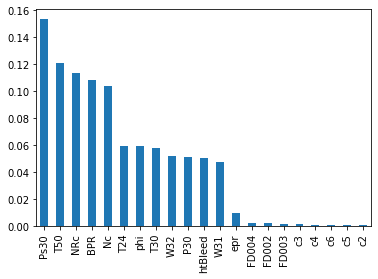

In [157]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar()

LightGBM Classifier

In [78]:
lgbm = LGBMClassifier()
lgbm_clf = lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm_clf.predict(X_val)
p_pred_lgbm = lgbm_clf.predict_proba(X_val)[:,1]

In [30]:
accuracy = accuracy_score(y_val, y_pred_lgbm)
print(f"Accuracy : {accuracy}")
precision = precision_score(y_val, y_pred_lgbm)
print(f"Precision : {precision}")
recall = recall_score(y_val, y_pred_lgbm)
print(f"Recall / TPR : {recall}")
print("F1:", f1_score(y_val, y_pred_lgbm))
AUC = roc_auc_score(y_val, p_pred_lgbm)
print(f"Area Under Curve : {AUC}")
print(" "*3)
cnf_matrix = confusion_matrix(y_val, y_pred_lgbm)
print('Confusion matrix for \ndefault LightGBM:\n', cnf_matrix)

Accuracy : 0.8456861338904306
Precision : 0.824236583138886
Recall / TPR : 0.9163142164326397
F1: 0.8678398803642482
Area Under Curve : 0.9153986481658936
   
Confusion matrix for 
default LightGBM:
 [[10873  3465]
 [ 1484 16249]]


In [79]:
y_pred_lgbm_test = lgbm_clf.predict(X_test)
p_pred_lgbm_test = lgbm_clf.predict_proba(X_test)[:,1]

In [83]:
accuracy = accuracy_score(y_test, y_pred_lgbm_test)
print(f"Accuracy : {accuracy}")
precision = precision_score(y_test, y_pred_lgbm_test)
print(f"Precision : {precision}")
recall = recall_score(y_test, y_pred_lgbm_test)
print(f"Recall / TPR : {recall}")
print("F1:", f1_score(y_test, y_pred_lgbm_test))
AUC = roc_auc_score(y_test, p_pred_lgbm_test)
print(f"Area Under Curve : {AUC}")
print(" "*3)
cnf_matrix = confusion_matrix(y_test, y_pred_lgbm_test)
print('Confusion matrix for \ndefault LightGBM test:\n', cnf_matrix)

Accuracy : 0.7977369165487977
Precision : 0.6676470588235294
Recall / TPR : 0.8832684824902723
F1: 0.7604690117252931
Area Under Curve : 0.8963856463467359
   
Confusion matrix for 
default LightGBM test:
 [[337 113]
 [ 30 227]]


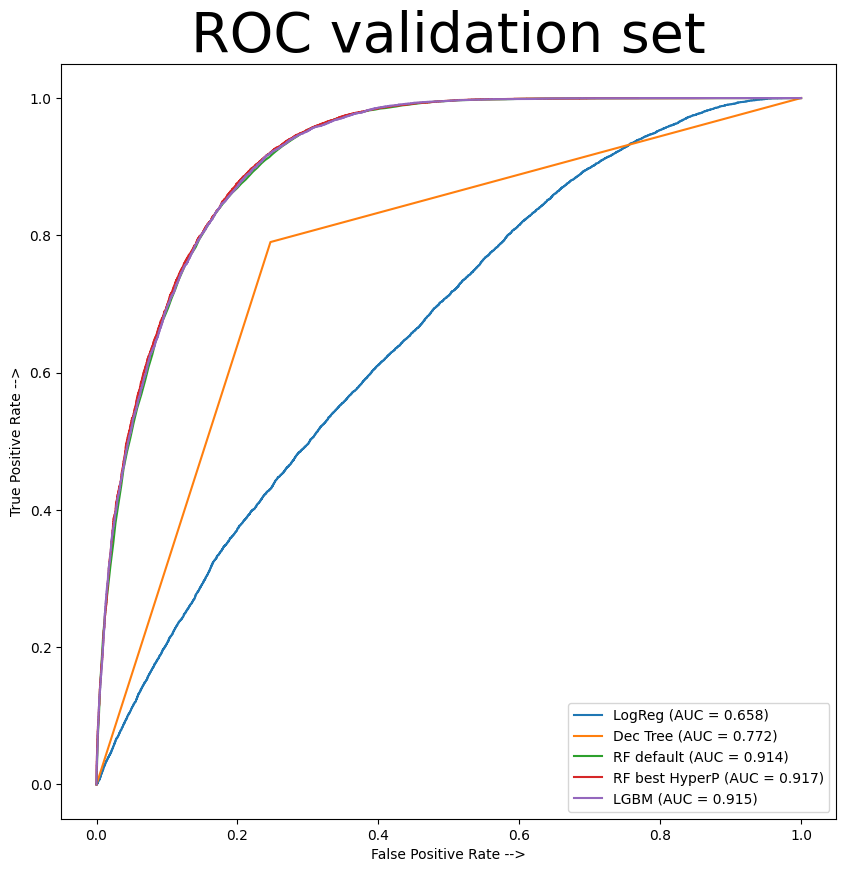

In [162]:
#LogReg
logreg_fpr, logreg_tpr, threshold = roc_curve(y_val, p_pred_logreg)
auc_logreg = roc_auc_score(y_val, p_pred_logreg)

#Dec tree 
tree_fpr, tree_tpr, threshold = roc_curve(y_val, p_pred_tree)
auc_tree = roc_auc_score(y_val, p_pred_tree)

#RF
rf_fpr, rf_tpr, threshold = roc_curve(y_val, p_pred_rf)
auc_rf = roc_auc_score(y_val, p_pred_rf)

#Best_RF
best_rf_fpr, best_rf_tpr, threshold = roc_curve(y_val, p_pred_best_rf)
auc_best_rf = roc_auc_score(y_val, p_pred_best_rf)

#LightGBM
lgmb_fpr, lgbm_tpr, threshold = roc_curve(y_val, p_pred_lgbm)
auc_lgbm = roc_auc_score(y_val, p_pred_lgbm)



plt.figure(figsize=(10, 10), dpi=100)
plt.plot(logreg_fpr, logreg_tpr, label='LogReg (AUC = %0.3f)' % auc_logreg)
plt.plot(tree_fpr, tree_tpr, label='Dec Tree (AUC = %0.3f)' % auc_tree)
plt.plot(rf_fpr, rf_tpr, label='RF default (AUC = %0.3f)' % auc_rf)
plt.plot(best_rf_fpr, best_rf_tpr, label='RF best HyperP (AUC = %0.3f)' % auc_best_rf)
plt.plot(lgmb_fpr, lgbm_tpr, label='LGBM (AUC = %0.3f)' % auc_lgbm)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.title("ROC validation set", fontsize = 40)
plt.legend()

plt.show()

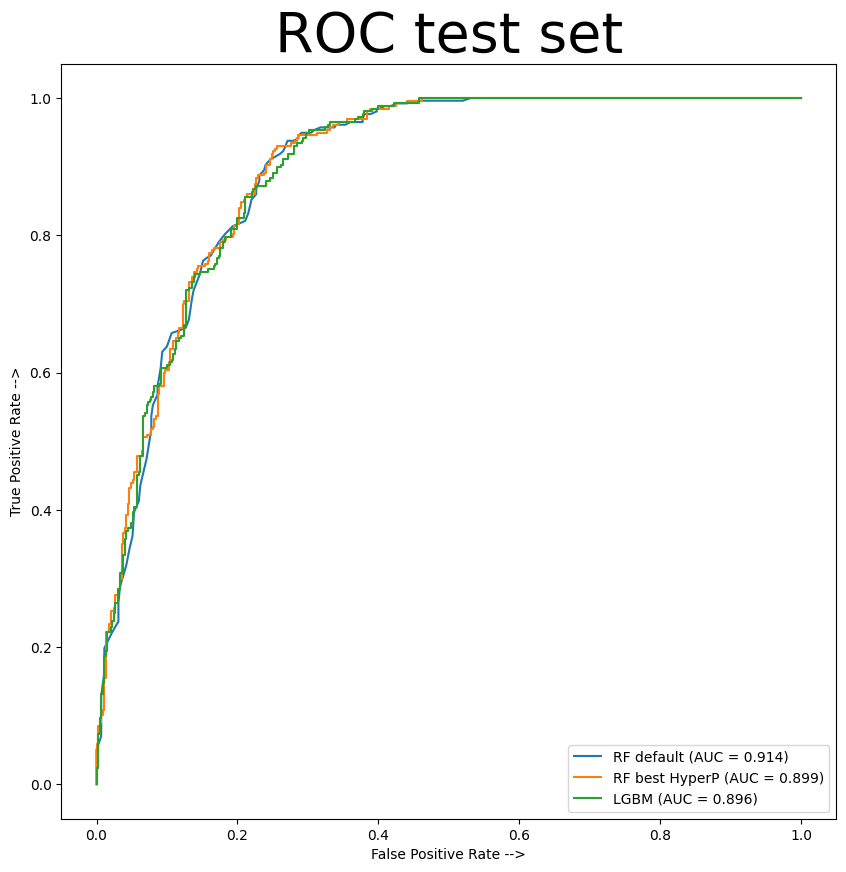

In [169]:

#RF
rft_fpr, rft_tpr, threshold = roc_curve(y_test, p_pred_rf_test)
auc_rft = roc_auc_score(y_test, p_pred_rf_test)

#Best_RF
best_rft_fpr, best_rft_tpr, threshold = roc_curve(y_test, p_pred_best_rf_test)
auc_best_rft = roc_auc_score(y_test, p_pred_best_rf_test)

#LightGBM
lgmbt_fpr, lgbmt_tpr, threshold = roc_curve(y_test, p_pred_lgbm_test)
auc_lgbmt = roc_auc_score(y_test, p_pred_lgbm_test)



plt.figure(figsize=(10, 10), dpi=100)
plt.plot(rft_fpr, rft_tpr, label='RF default (AUC = %0.3f)' % auc_rf)
plt.plot(best_rft_fpr, best_rft_tpr, label='RF best HyperP (AUC = %0.3f)' % auc_best_rft)
plt.plot(lgmbt_fpr, lgbmt_tpr, label='LGBM (AUC = %0.3f)' % auc_lgbmt)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.title("ROC test set", fontsize = 40)
plt.legend()

plt.show()

In [ ]:
logreg = LogisticRegression(random_state=42)

def model(model, X_train, y_train, X_val):
    model.fit(X_train, y_train)
    y_pred = model

In [ ]:
y_pred_lgbm = lgbm_clf.predict(X_val)
p_pred_lgbm = lgbm_clf.predict_proba(X_val)[:,1]

In [31]:
def lightgbm(df_train):

    X_variables = [
        'T24',
        'T30',
        'T50',
        'P30',
        'Nc',
        'epr',
        'Ps30',
        'phi',
        'NRc',
        'BPR', #ByPass Ratio
        'htBleed',
        'W31',
        'W32',
        'HPC_Fan',
        'c2', # condition 2
        'c3', # condition 3
        'c4', # condition 4
        'c5', # condition 5
        'c6', # condition 6
    ]

    output = []
    for value in range(-110, 0, 10):
        
        def make_y(row ,lt= value):
            return 1 if row["rem_cycles"] > lt else 0
        df_train['Class'] = df_train.apply(make_y, axis = 1)

        X = df_train[X_variables]
        y = df_train["Class"]

        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

        ltb = LGBMClassifier()
        ltb.fit(X_train, y_train)
        y_pred = ltb.predict(X_val)
        p_pred_prob = ltb.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, p_pred_prob)
        output.append([value, ltb, X_val, y_pred, y_val, p_pred_prob, auc])   
    return output

In [32]:
lightgbm_output = lightgbm(train)

In [39]:
tmp = list(map(list, zip(*lightgbm_output)))
#tmp[-1]
outputs = pd.DataFrame(data={"Lead_time":tmp[0],"lgbm_auc":tmp[-1]})

In [40]:
outputs

,Lead_time,lgbm_auc
0,-110,0.9042773583888459
1,-100,0.916767948794678
2,-90,0.9293914933869687
3,-80,0.9417037135767283
4,-70,0.9538368007480101
5,-60,0.9653680487780762
6,-50,0.9747770693469825
7,-40,0.9820751911639762
8,-30,0.9880460544171865
9,-20,0.991860948685965


In [180]:
for out in lightgbm_output:
    print(f"value is {out[0]}")
    print(f"auc is {out[-1]}")
    print(10*"-")

value is -110
auc is 0.9042773583888459
----------
value is -100
auc is 0.916767948794678
----------
value is -90
auc is 0.9293914933869687
----------
value is -80
auc is 0.9417037135767283
----------
value is -70
auc is 0.9538368007480101
----------
value is -60
auc is 0.9653680487780762
----------
value is -50
auc is 0.9747770693469825
----------
value is -40
auc is 0.9820751911639762
----------
value is -30
auc is 0.9880460544171865
----------
value is -20
auc is 0.991860948685965
----------
value is -10
auc is 0.9931714699510044
----------


In [41]:
def random_forest(df_train):

    X_variables = [
        'T24',
        'T30',
        'T50',
        'P30',
        'Nc',
        'epr',
        'Ps30',
        'phi',
        'NRc',
        'BPR', #ByPass Ratio
        'htBleed',
        'W31',
        'W32',
        'HPC_Fan',
        'c2', # condition 2
        'c3', # condition 3
        'c4', # condition 4
        'c5', # condition 5
        'c6', # condition 6
    ]

    output = []
    for value in range(-110, 0, 10):
        
        def make_y(row ,lt= value):
            return 1 if row["rem_cycles"] > lt else 0
        df_train['Class'] = df_train.apply(make_y, axis = 1)

        X = df_train[X_variables]
        y = df_train["Class"]

        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

        rf = RandomForestClassifier()
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)
        y_pred_proba = rf.predict_proba(X_val)[::,1]
        auc = roc_auc_score(y_val, y_pred_proba)
        output.append([value, rf, X_val, y_pred, y_val, y_pred_proba, auc])   
    return output

In [42]:
rf_output = random_forest(train)

In [43]:
tmp = list(map(list, zip(*rf_output)))

rf_outputs = pd.DataFrame(data={"Lead_time":tmp[0],"rf_auc":tmp[-1]})

In [186]:
for out in rf_output:
    print(f"value is {out[0]}")
    print(f"auc is {out[-1]}")
    print(10*"-")

value is -110
auc is 0.9032877224757889
----------
value is -100
auc is 0.9158626235400867
----------
value is -90
auc is 0.9282576997327079
----------
value is -80
auc is 0.9397777744394351
----------
value is -70
auc is 0.9524645491368964
----------
value is -60
auc is 0.9634829284036681
----------
value is -50
auc is 0.9727808445188976
----------
value is -40
auc is 0.9808198142596838
----------
value is -30
auc is 0.9867052692213276
----------
value is -20
auc is 0.9914569309877762
----------
value is -10
auc is 0.993813239872692
----------


In [47]:
def random_forest_best(df_train):

    X_variables = [
        'T24',
        'T30',
        'T50',
        'P30',
        'Nc',
        'epr',
        'Ps30',
        'phi',
        'NRc',
        'BPR', #ByPass Ratio
        'htBleed',
        'W31',
        'W32',
        'HPC_Fan',
        'c2', # condition 2
        'c3', # condition 3
        'c4', # condition 4
        'c5', # condition 5
        'c6', # condition 6
    ]

    output = []
    for value in range(-110, 0, 10):
        
        def make_y(row ,lt= value):
            return 1 if row["rem_cycles"] > lt else 0
        df_train['Class'] = df_train.apply(make_y, axis = 1)

        X = df_train[X_variables]
        y = df_train["Class"]

        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

        rf_best = RandomForestClassifier(max_depth = 16, n_estimators = 362)
        rf_best.fit(X_train, y_train)
        y_pred = rf_best.predict(X_val)
        y_pred_proba = rf_best.predict_proba(X_val)[::,1]
        auc = roc_auc_score(y_val, y_pred_proba)
        output.append([value, rf_best, X_val, y_pred, y_val, y_pred_proba, auc])   
    return output

In [48]:
rf_best_output = random_forest_best(train)

In [66]:
tmp = list(map(list, zip(*rf_best_output)))

rf_best_outputs = pd.DataFrame(data={"Lead_time":tmp[0],"rf_best_auc":tmp[-1]})

In [67]:
rf_best_outputs

,Lead_time,rf_best_auc
0,-110,0.9059738214892048
1,-100,0.9178814819878719
2,-90,0.9304681708414402
3,-80,0.9420165361802072
4,-70,0.9539398043515349
5,-60,0.9651289137215343
6,-50,0.9746808024631448
7,-40,0.9821287431269137
8,-30,0.9881808307469996
9,-20,0.9921448997223978


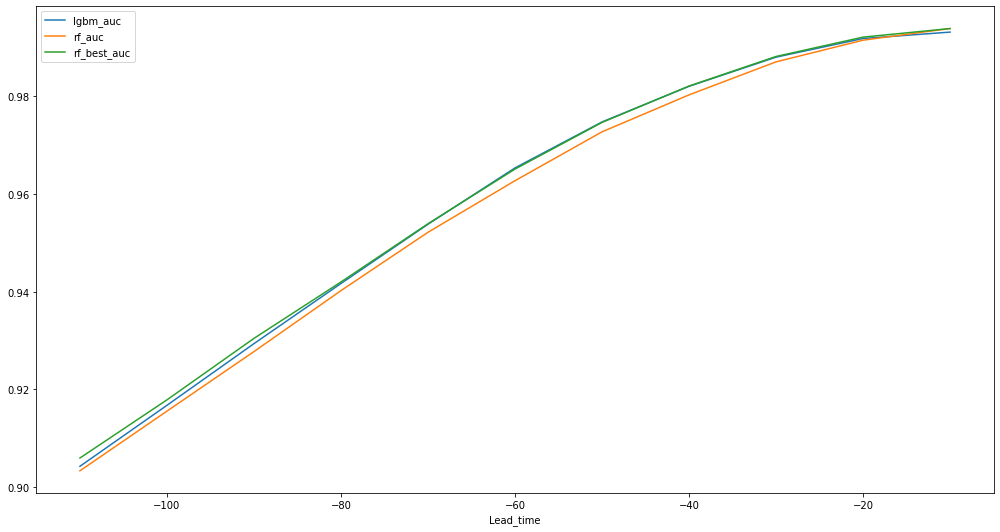

In [73]:
import pandas as pd
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [14.00, 7.50]
plt.rcParams["figure.autolayout"] = True

df1 = outputs
df2 = rf_outputs
df3 = rf_best_outputs


ax = outputs.plot(x='Lead_time', y='lgbm_auc')
rf_outputs.plot(ax=ax, x='Lead_time', y='rf_auc')
rf_best_outputs.plot(ax=ax, x='Lead_time', y='rf_best_auc')

#plt.plot(rf_best_outputs['Lead_time'], rf_best_outputs['rf_best_auc'], 'g')
#plt.plot(outputs['Lead_time'], outputs['lgbm_auc'], 'r')
#plt.plot(rf_outputs['Lead_time'], rf_outputs['rf_auc'], 'b')

plt.show()

In [70]:
rf_best_output

[[-110,
  RandomForestClassifier(max_depth=16, n_estimators=362),
            T24      T30      T50    P30       Nc  epr  Ps30    phi      NRc  \
  40419  608.44 1,495.88 1,269.57 333.87 8,732.35 1.07 45.07 313.97 8,051.93   
  15356  643.42 1,601.28 1,429.56 550.81 9,049.71  1.3 48.04 520.04 8,124.53   
  26127   555.4 1,362.31 1,116.49 194.78 8,358.89 1.02 41.64 183.51 8,079.26   
  43242  555.36 1,354.87  1,118.3 194.59  8,364.4 1.02 41.82 183.93  8,078.5   
  65091  549.53 1,346.86 1,121.77 138.57 8,321.37 1.02 42.09 130.34 8,084.51   
  ...       ...      ...      ...    ...      ...  ...   ...    ...      ...   
  34240  550.01 1,363.04 1,134.23 138.01 8,322.81 1.02  42.6 130.03 8,072.58   
  147355  537.0  1,263.2 1,048.79 175.09 8,006.62 0.94 36.73 163.84 7,871.66   
  61073  549.61 1,358.17 1,127.41  138.1 8,313.76 1.02 42.32  130.7 8,078.97   
  84008  642.74 1,586.46  1,396.6 554.18 9,060.86  1.3 47.05 522.36 8,142.78   
  66930  549.83 1,353.01 1,136.38 138.32 8,330.44 1.02

In [191]:
for out in rf_best_output:
    print(f"value is {out[0]}")
    print(f"auc is {out[-1]}")
    print(10*"-")

value is -110
auc is 0.9059594735804436
----------
value is -100
auc is 0.9177981944766953
----------
value is -90
auc is 0.9303697101495743
----------
value is -80
auc is 0.9421999897548127
----------
value is -70
auc is 0.9539333551260665
----------
value is -60
auc is 0.9651352261656049
----------
value is -50
auc is 0.9746649169223066
----------
value is -40
auc is 0.9822106624346088
----------
value is -30
auc is 0.9881499581893951
----------
value is -20
auc is 0.9921598038731425
----------
value is -10
auc is 0.9938633603660185
----------


In [196]:
print(out[0])

-10


In [1]:
print(out[-1])

NameError: name 'out' is not defined

In [ ]:
#zaprojektować przechwytywanie 

### SHAP LightGBM

In [198]:
feature_importances = pd.Series(lgbm_clf.feature_importances_, index=X_train.columns)

print('Score of LightGBM model on validation split\n', lgbm_clf.score(X_val,y_val))

Score of LightGBM model on validation split
 0.8456861338904306


In [199]:
# creating an explainer for our model
explainer = shap.TreeExplainer(lgbm_clf) # we only need to pass our  fitted model to tree explainer. 
                                    #No background dataset in 'data' argument required for tree models as it
                                    #is automatically received through the model tree object.

# finding out the shap values using the explainer
shap_values = explainer.shap_values(X_train)

# Expected/Base/Reference value = the value that would be predicted if we didn’t know any features of the current output”
print('Expected Value:', explainer.expected_value)

Expected Value: [0.14298319733496867, -0.14298319733496867]


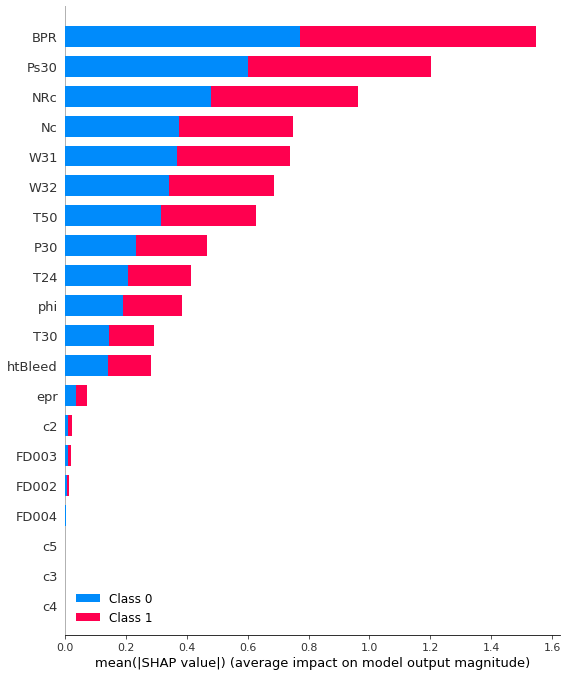

In [200]:
shap.initjs()
shap.summary_plot(shap_values, X_val)

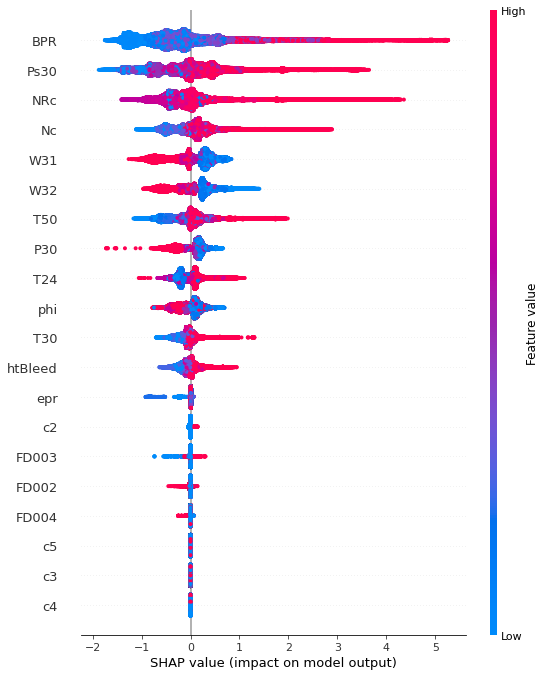

In [201]:
shap.initjs()
shap.summary_plot(shap_values[0], X_train)

In [ ]:
### SHAP Random Forest Parametized

In [203]:
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns)

print('Score of RF Parametized model on validation split\n', best_rf.score(X_val,y_val))

Score of RF Parametized model on validation split
 0.8459355804309189


In [204]:
# creating an explainer for our model
explainer = shap.TreeExplainer(best_rf) # we only need to pass our  fitted model to tree explainer. 
                                    #No background dataset in 'data' argument required for tree models as it
                                    #is automatically received through the model tree object.

# finding out the shap values using the explainer
shap_values = explainer.shap_values(X_train)

# Expected/Base/Reference value = the value that would be predicted if we didn’t know any features of the current output”
print('Expected Value:', explainer.expected_value)

In [ ]:
shap.initjs()
shap.summary_plot(shap_values, X_val)